!pip install numpy pandas matplotlib seaborn keras tensorflow

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error

2024-06-06 07:25:12.266571: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-06 07:25:12.271720: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-06 07:25:12.355368: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-06 07:25:14.119010: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# # Set the path to the directory containing the files
# path = '../data'

# # Create an empty list to store the names of the files
# files = []

# # Loop through all the files in the directory and add the file names to the list
# for file in os.listdir(path):
#     if file.endswith('.csv'):
#         files.append(os.path.join(path, file))

# # Use pandas to read all the files in the list into a single DataFrame
# df = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)
df=pd.read_csv('./p2-east-1b.csv')
df.head
df.shape

(7182, 5)

In [3]:
df.head

<bound method NDFrame.head of       2017-05-08 21:42:56+00:00  p2.xlarge  Linux/UNIX  us-east-1b    0.25
0     2017-05-08 21:41:01+00:00  p2.xlarge  Linux/UNIX  us-east-1b  0.2402
1     2017-05-08 21:40:05+00:00  p2.xlarge  Linux/UNIX  us-east-1b  0.2414
2     2017-05-08 21:42:56+00:00  p2.xlarge  Linux/UNIX  us-east-1b  0.2500
3     2017-05-08 21:41:01+00:00  p2.xlarge  Linux/UNIX  us-east-1b  0.2402
4     2017-05-08 21:40:05+00:00  p2.xlarge  Linux/UNIX  us-east-1b  0.2414
...                         ...        ...         ...         ...     ...
7177  2017-04-26 15:26:03+00:00  p2.xlarge  Linux/UNIX  us-east-1b  0.1613
7178  2017-04-26 15:25:01+00:00  p2.xlarge  Linux/UNIX  us-east-1b  0.1610
7179  2017-04-26 15:23:21+00:00  p2.xlarge  Linux/UNIX  us-east-1b  0.1616
7180  2017-04-26 15:22:21+00:00  p2.xlarge  Linux/UNIX  us-east-1b  0.1623
7181  2017-04-26 15:21:19+00:00  p2.xlarge  Linux/UNIX  us-east-1b  0.1620

[7182 rows x 5 columns]>

In [4]:
df.shape

(7182, 5)

In [5]:
print(df.isnull().sum())

2017-05-08 21:42:56+00:00    0
p2.xlarge                    0
Linux/UNIX                   0
us-east-1b                   0
0.25                         0
dtype: int64


In [6]:
df.head()

,2017-05-08 21:42:56+00:00,p2.xlarge,Linux/UNIX,us-east-1b,0.25
0,2017-05-08 21:41:01+00:00,p2.xlarge,Linux/UNIX,us-east-1b,0.2402
1,2017-05-08 21:40:05+00:00,p2.xlarge,Linux/UNIX,us-east-1b,0.2414
2,2017-05-08 21:42:56+00:00,p2.xlarge,Linux/UNIX,us-east-1b,0.2500
3,2017-05-08 21:41:01+00:00,p2.xlarge,Linux/UNIX,us-east-1b,0.2402
4,2017-05-08 21:40:05+00:00,p2.xlarge,Linux/UNIX,us-east-1b,0.2414


In [7]:
df=df.dropna(how='any', axis=0).dropna(how='any', axis=1)
df.isnull().sum()

2017-05-08 21:42:56+00:00    0
p2.xlarge                    0
Linux/UNIX                   0
us-east-1b                   0
0.25                         0
dtype: int64

In [8]:
# Normalize the cost values
scaler = MinMaxScaler()
df['0.25'] = scaler.fit_transform(df[['0.25']])

# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
X, y = create_sequences(df['0.25'].values, seq_length)

# Reshape X to 3D array for LSTM input
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into training and validation sets
split_index = int(len(X) * 0.8)
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(seq_length, 1)))  # Define input shape
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
# model.add(LSTM(50, return_sequences=True))
# model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=50, verbose=1)


Epoch 1/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 0.0108 - val_loss: 6.2126e-04
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0022 - val_loss: 7.3839e-04
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0017 - val_loss: 5.0734e-04
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0014 - val_loss: 3.4154e-04
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0015 - val_loss: 3.0936e-04
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0012 - val_loss: 3.5652e-04
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0012 - val_loss: 2.6857e-04
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 9.4632e-04 - val_loss: 3.0468e-04
Epoch 9/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0011 - val_loss: 2.3641e-04
Epoch 10/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 9.7420e-04 - val_loss: 2.1395e-04
Epoch 11/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 9.1731e-

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Calculate evaluation metrics
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
MAE: 0.005649601085486949
MSE: 0.00013788065185113346
RMSE: 0.011742259231133225


180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


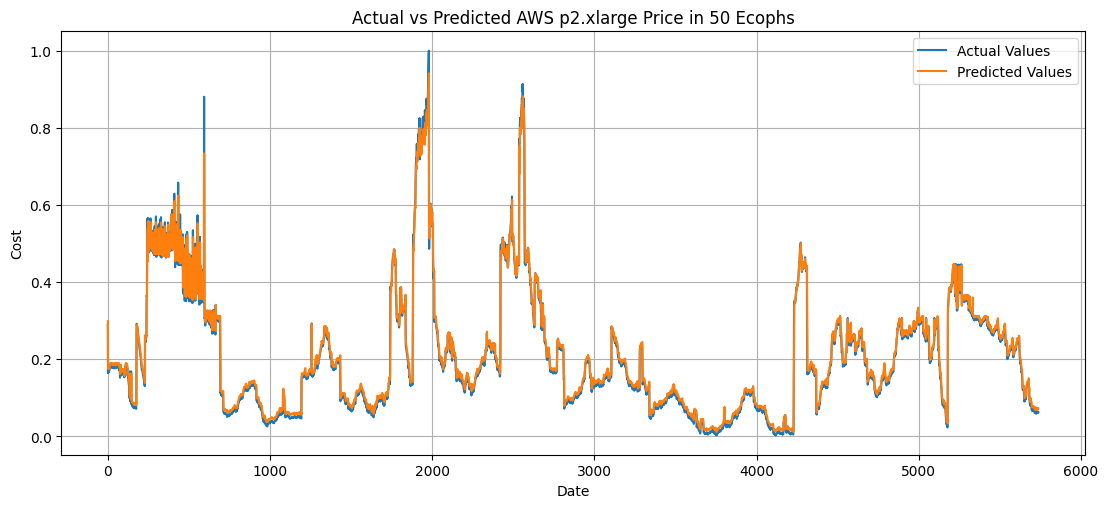

In [17]:
import matplotlib.pyplot as plt

# Predict the values for the training set
y_train_pred = model.predict(X_train)

# Reshape the predicted values to match the shape of the actual values
y_train_pred = y_train_pred.reshape(-1)

# Plot the predicted and actual values
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Actual Values')
plt.plot(y_train_pred, label='Predicted Values')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.title('Actual vs Predicted AWS p2.xlarge Price in 50 Ecophs')
plt.legend()
plt.grid(True)
plt.tight_layout(pad=4.0)
plt.savefig('./Actual vs Predicted AWS p2.xlarge Price in 50 Ecophs.png')
plt.show()

In [14]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Number of folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = []
mse_scores = []
rmse_scores = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Assuming your model is already defined as `model`
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

# Average scores
avg_mae = np.mean(mae_scores)
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)

print(f'Average MAE: {avg_mae:.2f}')
print(f'Average MSE: {avg_mse:.2f}')
print(f'Average RMSE: {avg_rmse:.2f}')


180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 5.8979e-04
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 5.6986e-04
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 6.8498e-04
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 5.5732e-04
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 6.4347e-04
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Average MAE: 0.01
Average MSE: 0.00
Average RMSE: 0.02


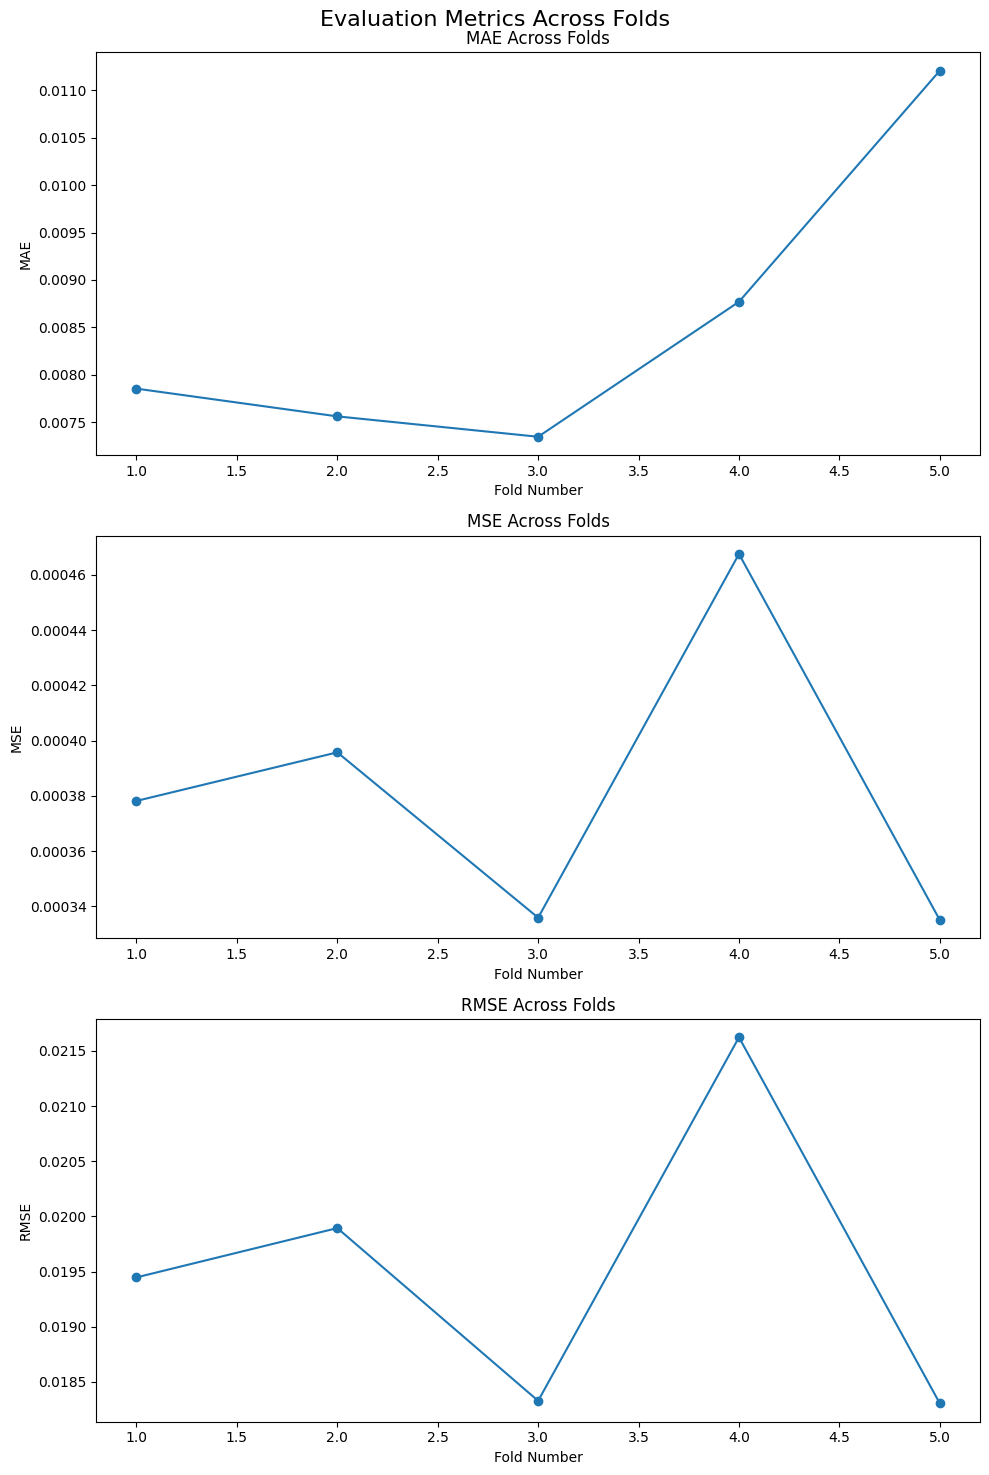

In [18]:
import matplotlib.pyplot as plt

# Plotting MAE, MSE, RMSE across folds
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

ax[0].plot(range(1, len(mae_scores) + 1), mae_scores, marker='o')
ax[0].set_title('MAE Across Folds')
ax[0].set_xlabel('Fold Number')
ax[0].set_ylabel('MAE')

ax[1].plot(range(1, len(mse_scores) + 1), mse_scores, marker='o')
ax[1].set_title('MSE Across Folds')
ax[1].set_xlabel('Fold Number')
ax[1].set_ylabel('MSE')

ax[2].plot(range(1, len(rmse_scores) + 1), rmse_scores, marker='o')
ax[2].set_title('RMSE Across Folds')
ax[2].set_xlabel('Fold Number')
ax[2].set_ylabel('RMSE')

plt.suptitle('Evaluation Metrics Across Folds', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.tight_layout()
plt.savefig('./evaluation_metrics_across_folds 50 Ecophs.png')

plt.show()
